In [11]:
import pandas as pd 
import sklearn

df = pd.read_excel('RiskON Project - Risk events examples.xlsx')

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Incident ref                   6 non-null      object        
 1   Date of incident               6 non-null      datetime64[ns]
 2   Date of report                 6 non-null      datetime64[ns]
 3   Legal entity                   6 non-null      object        
 4   Country                        6 non-null      object        
 5   Business Line                  6 non-null      object        
 6   Team                           6 non-null      object        
 7   Client number                  6 non-null      object        
 8   Code / type of incident (E)    6 non-null      object        
 9   Description of incident        6 non-null      object        
 10  Cat_Incident                   6 non-null      object        
 11  P&L Impact             

,Incident ref,Date of incident,Date of report,Legal entity,Country,Business Line,Team,Client number,Code / type of incident (E),Description of incident,...,P&L Impact,Amount in CHF,Product / operation concerned,Process_L1,Process_L2,Risk Taxonomy_L1,Risk Taxonomy_L2,Risk Taxonomy_L3,Root_Cause_L1,Root_Cause_L2
0,Incident 1,2018-01-01,2018-01-01,Entity 1,Switzerland,BL 1,Team 1,Client 1,Misunderstanding: Incorrect order instruction,The Banker has received an unclear order instr...,...,Loss,-1000,Investment funds,Trading,Order execution,R5 - Operational,R5.4 - Transaction Processing and Execution,R5.4.2 - Processing/execution failure relating...,Process failure,Procedure/process implementation failure
1,Incident 2,2019-01-01,2019-01-01,Entity 1,Switzerland,BL 2,Team 2,Client 2,Technical failure: System failure (IT and other),When reporting to the client his quarterly fee...,...,Income reduction,-5000,Periodical fees,Operations,Pricing & tariffs,R5 - Operational,R5.3 - Technology,R5.3.4 - Insufficient or inadequate IT infrast...,Systems,Functionality issues
2,Incident 3,2020-01-01,2020-01-01,Entity 2,Luxembourg,BL 3,Team 3,Client 3,Lack of attention: Incorrect quantity/amount,The trader has incorrectly input in the system...,...,Loss,-2000,Securities operations,Trading,Order execution,R5 - Operational,R5.4 - Transaction Processing and Execution,R5.4.2 - Processing/execution failure relating...,Process failure,Procedure/process implementation failure
3,Incident 4,2021-01-01,2021-01-01,Entity 1,Switzerland,BL 4,Team 4,Client 4,Technical failure: System failure (IT and other),When cancelling a credit card of a client by t...,...,Loss,-200,Fund transfers,Cash and securities management,Cash transfer,R5 - Operational,R5.3 - Technology,R5.3.4 - Insufficient or inadequate IT infrast...,Systems,Misconfiguration
4,Incident 5,2022-01-01,2022-01-01,Entity 2,Luxembourg,BL 5,Team 5,Client 5,Lack of attention: Incorrect codification on f...,At the initial codification in the system of a...,...,Loss,-30000,Securities operations,Operations,Tax production,R5 - Operational,R5.11 Statutory Reporting and Tax,R5.11.2 - Tax payment/filing failure,Process failure,Procedure/process implementation failure
5,Incident 6,2023-01-01,2023-01-01,Entity 3,Singapore,BL 6,Team 6,Client 6,"Lack of attention: Unauthorised operation, bre...",A fund manager has inappropriately managed a c...,...,Loss,-7000,Investment funds,Investment,Portfolio management,R6 - Compliance,R6.5 - Investor protection,R6.5.3 - Investment restrictions,Process failure,Procedure/process implementation failure


<Axes: >

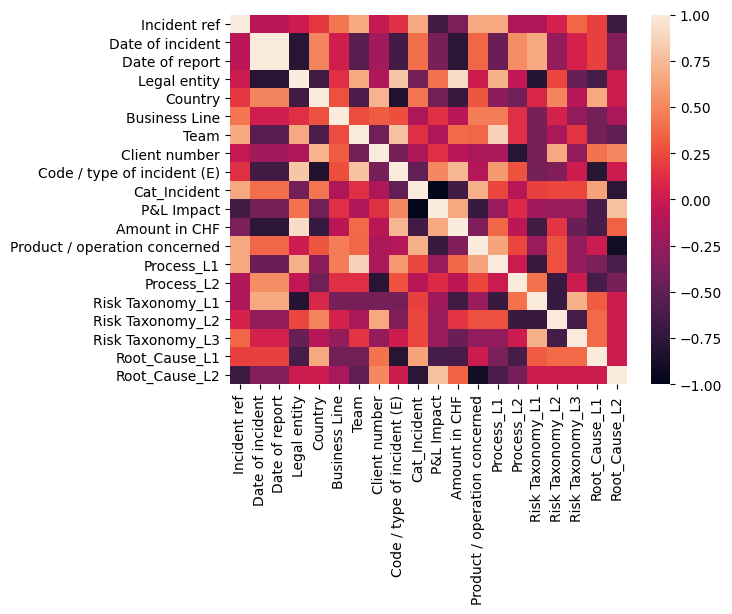

In [17]:
def transform_time(x, col):
    x[col] = x[col].apply(lambda x: x.timestamp())
    return x

def transform_onehot(x, col):
    unique_keys  = set(x[col])
    mapping = {key: i for i, key in enumerate(unique_keys)}
    x[col] = x[col].map(mapping)
    return x, mapping

mappings = {}
df_ = df.copy()
intger_cols   = ["Amount in CHF"]
useless_cols  = ["Incident ref"]
literal_cols  = ["Description of incident"]
datetime_cols = ['Date of incident', 'Date of report']
onehot_cols   = [i for i in df.columns if i not in literal_cols + datetime_cols]
for col in onehot_cols:
    df_, mappings[col] = transform_onehot(df_, col)

for col in datetime_cols:
    df_ = transform_time(df_, col)

# print(df_)

# print(mappings)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.heatmap(df_.corr())